In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import plot_confusion_matrix

In [2]:
# the following lines must be uncommented if you want to have interactive plots
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
WTvsMUT_bundle = pd.read_csv('WTvsMutLog2FC.txt',sep='\t',index_col='gene')

WT_data =  WTvsMUT_bundle.filter(regex='B6_\d+ng_B6_NT1')
mut_data = WTvsMUT_bundle.filter(regex='1h_\d+ng_1h_NT1')
WTvsMUT_all = pd.concat([WT_data,mut_data],axis=1).fillna(0)

WTvsMUT = WTvsMUT_all[(WTvsMUT_all.T != 0).any()]

WTvsMUT

,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1
gene,,,,,,
Gsta3,2.798340,3.42470,3.255930,2.647470,3.201720,2.537300
Cd28,-1.389800,-3.52847,-4.290400,-1.521790,-4.016830,0.000000
Stk36,-2.133620,0.00000,0.000000,0.000000,0.000000,0.000000
Ramp1,-1.499170,-3.76724,-5.367170,-2.150380,-4.725410,0.000000
Serpinb12,2.266460,2.57571,2.215400,0.000000,2.259490,0.000000
Tnfsf4,2.607320,3.87224,6.550920,2.713020,5.556300,6.288090
Fcgr4,-1.050890,0.00000,0.000000,-0.875810,1.654800,1.172200
Slamf9,0.835011,2.35234,3.502040,0.881447,2.806460,2.992860
Tagln2,0.880628,1.16298,1.068210,0.000000,0.000000,0.000000


In [4]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(WTvsMUT.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_WTvsMUT = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=WTvsMUT.columns)
PCA_WTvsMUT

Explained variances by components:  [0.56593421 0.18295973 0.1563747 ] total variance explained:  0.9052686487477096


,PC1,PC2,PC3
B6_2ng_B6_NT1,-50.415666,-24.249167,-1.027338
B6_10ng_B6_NT1,6.631894,0.237829,-33.851685
B6_50ng_B6_NT1,80.938935,-27.596320,8.315959
1h_2ng_1h_NT1,-46.858920,-12.983216,5.174632
1h_10ng_1h_NT1,11.065471,39.355359,-18.409268
1h_50ng_1h_NT1,-1.361713,25.235514,39.797700


<IPython.core.display.Javascript object>


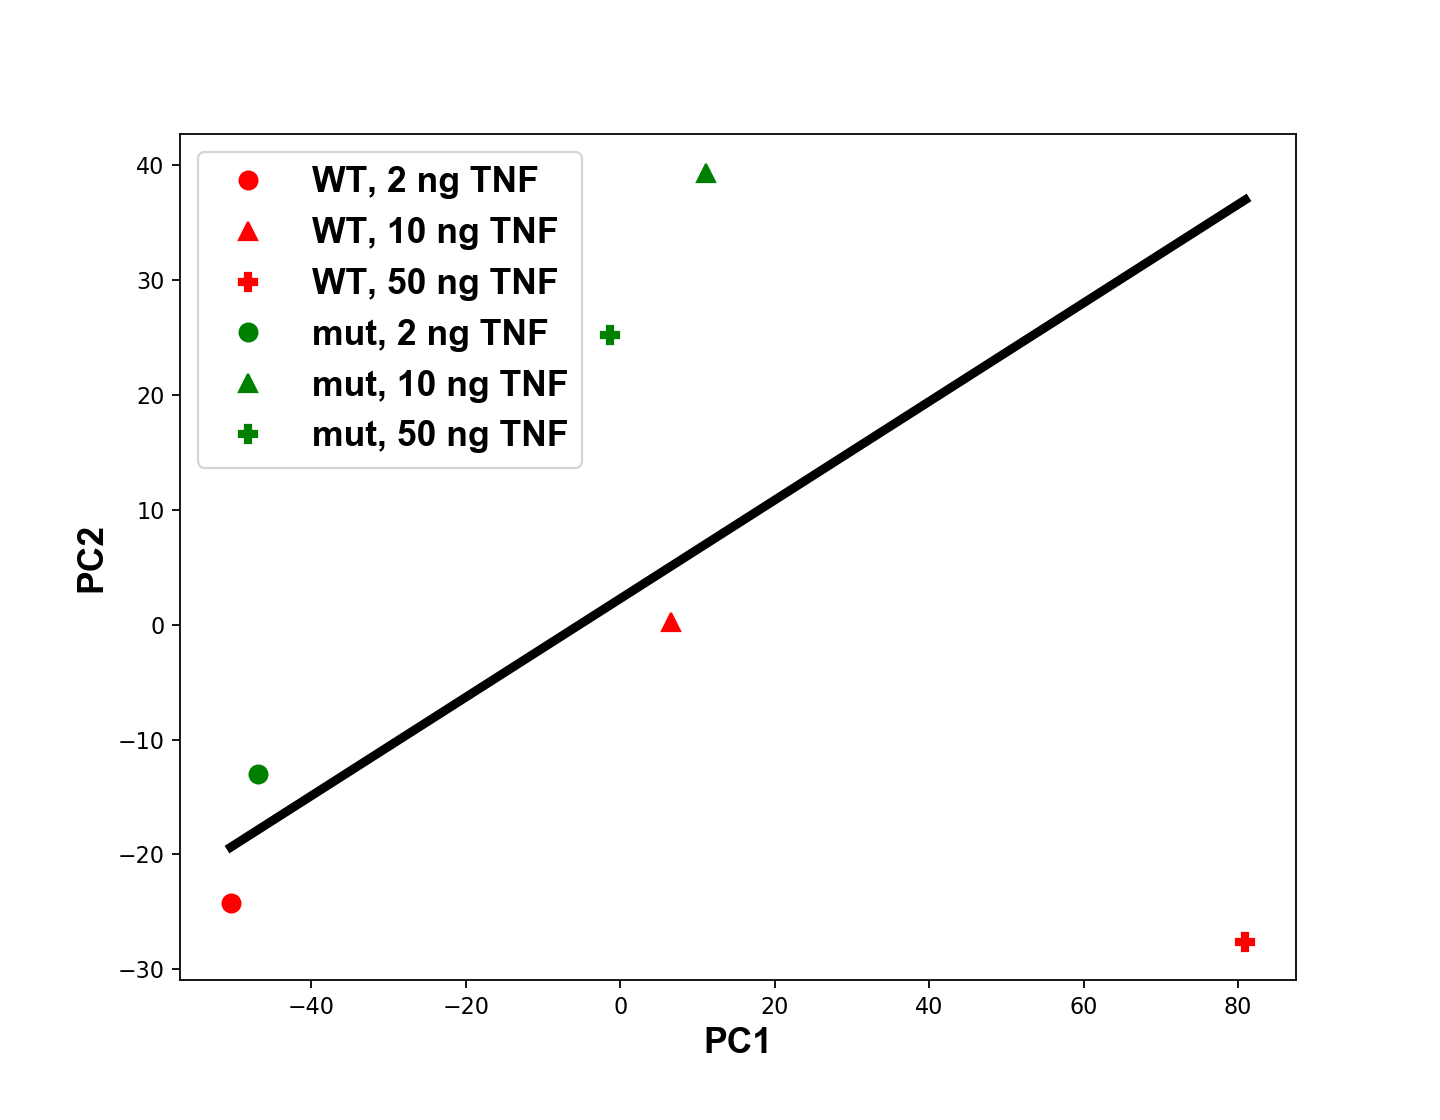

In [5]:

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(PCA_WTvsMUT.iloc[:,:2],[1,1,1,0,0,0])
norm_vec_PCA = svc_PCA.coef_[0]
b_coef_PCA = svc_PCA.intercept_[0]

x_min = min(PCA_WTvsMUT['PC1'])
x_max = max(PCA_WTvsMUT['PC1'])
y_min = -(b_coef_PCA + norm_vec_PCA[0]*x_min)/norm_vec_PCA[1]
y_max = -(b_coef_PCA + norm_vec_PCA[0]*x_max)/norm_vec_PCA[1]



fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot([x_min,x_max],[y_min,y_max],'-',linewidth=4,color='black')

ax.plot(PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='WT, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='WT, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='WT, 50 ng TNF',ms=8) 

ax.plot(PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='mut, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='mut, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='mut, 50 ng TNF',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()

# we can see clear separation

In [6]:
col_names = ['M','T','TM','TMR','TMI','TMRI','TM_b','TMR_b','TMS','TMRS']
data_table=[]
err_table=[]

for col_name in col_names:
    DEG_df = pd.read_csv('res_'+col_name+'_vs_UNTREAT.csv',index_col=0)
    DEG_df_filt=DEG_df.copy()
    data_table.append(DEG_df_filt['log2FoldChange'])

lFC_names = pd.concat(data_table,axis=1,sort=True).fillna(0)
lFC_names.columns = col_names
lFC_names.to_csv('lFC_DEGs_table.csv')

DPD_counts_df = pd.read_csv('DPDs_groups_TB.csv',index_col=0)

lFC_names

,M,T,TM,TMR,TMI,TMRI,TM_b,TMR_b,TMS,TMRS
A030001D20Rik,-0.234446,-1.713568,-1.757057,-2.789130,-1.675708,-2.831864,-0.820866,-1.772423,-0.643580,-0.302250
A030005L19Rik,-0.033831,0.841061,0.248590,-0.102697,0.257430,-0.914743,0.759560,-0.455556,-0.394808,-2.759954
A130006I12Rik,-1.412332,-1.699553,0.018297,-2.511974,-0.935987,-4.029876,-0.585165,-3.030023,-1.939752,-4.907650
A130010J15Rik,-0.469826,-0.370653,-0.521587,0.112828,-0.569709,0.132788,-0.654533,0.225625,-0.600277,0.177853
A130012E19Rik,-0.889504,-0.987275,-2.079092,-1.791029,-0.137064,-1.539585,-0.892056,-3.951129,-1.608725,-1.480850
A130014A01Rik,-0.216436,-0.276395,-0.458014,-0.515068,-0.425882,-1.041834,-0.380244,-0.597802,-0.444469,-0.625711
A130048G24Rik,-0.521962,-1.114163,-0.807499,-2.058808,-0.896662,-2.096968,-2.560477,-1.024673,-0.710652,-3.020509
A130050O07Rik,-0.264364,-1.781588,-3.722095,-3.792377,-2.678966,-3.835111,-3.763758,-3.737460,-3.599806,-3.751092
A130051J06Rik,-0.568078,-0.142850,-0.361476,-0.010137,-0.286923,-0.339812,-0.453604,0.070928,-0.534983,-0.115809
A130071D04Rik,0.828286,-0.028343,0.340805,-0.403964,0.399577,-0.571281,0.442612,-0.582739,0.428017,-0.002589


In [8]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(lFC_names.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_pert = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=lFC_names.columns)
PCA_pert

Explained variances by components:  [0.2261912  0.17410129 0.1282191 ] total variance explained:  0.5285115972427004


,PC1,PC2,PC3
M,-84.716159,64.673434,-5.468914
T,-95.491595,44.842705,-74.907945
TM,-0.062865,88.661456,118.409130
TMR,243.319905,-105.483076,-30.539256
TMI,-118.730252,57.837656,19.923945
TMRI,102.902599,-132.525332,-205.672348
TM_b,-171.406160,3.370347,-20.199588
TMR_b,-145.389985,-69.046291,-39.915194
TMS,222.667704,251.705739,16.527427
TMRS,46.906807,-204.036639,221.842743


<IPython.core.display.Javascript object>


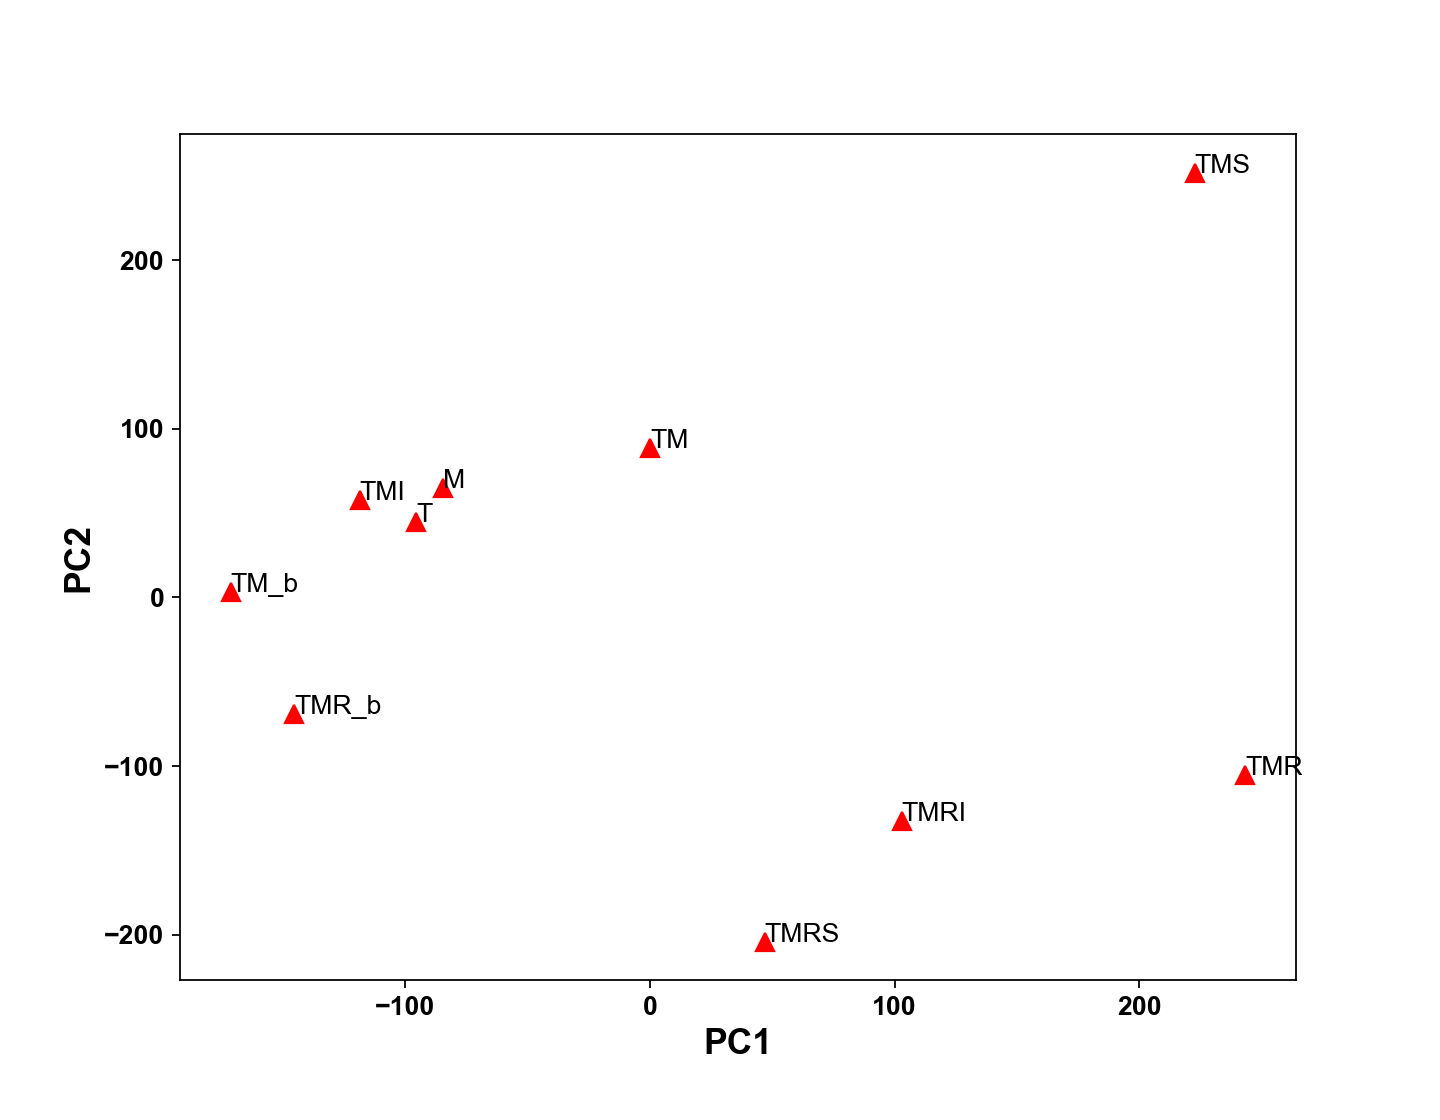

In [9]:

fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],'^',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)

for smpl in PCA_pert.index:
    ax.annotate(smpl,(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1]))

plt.show()


<IPython.core.display.Javascript object>


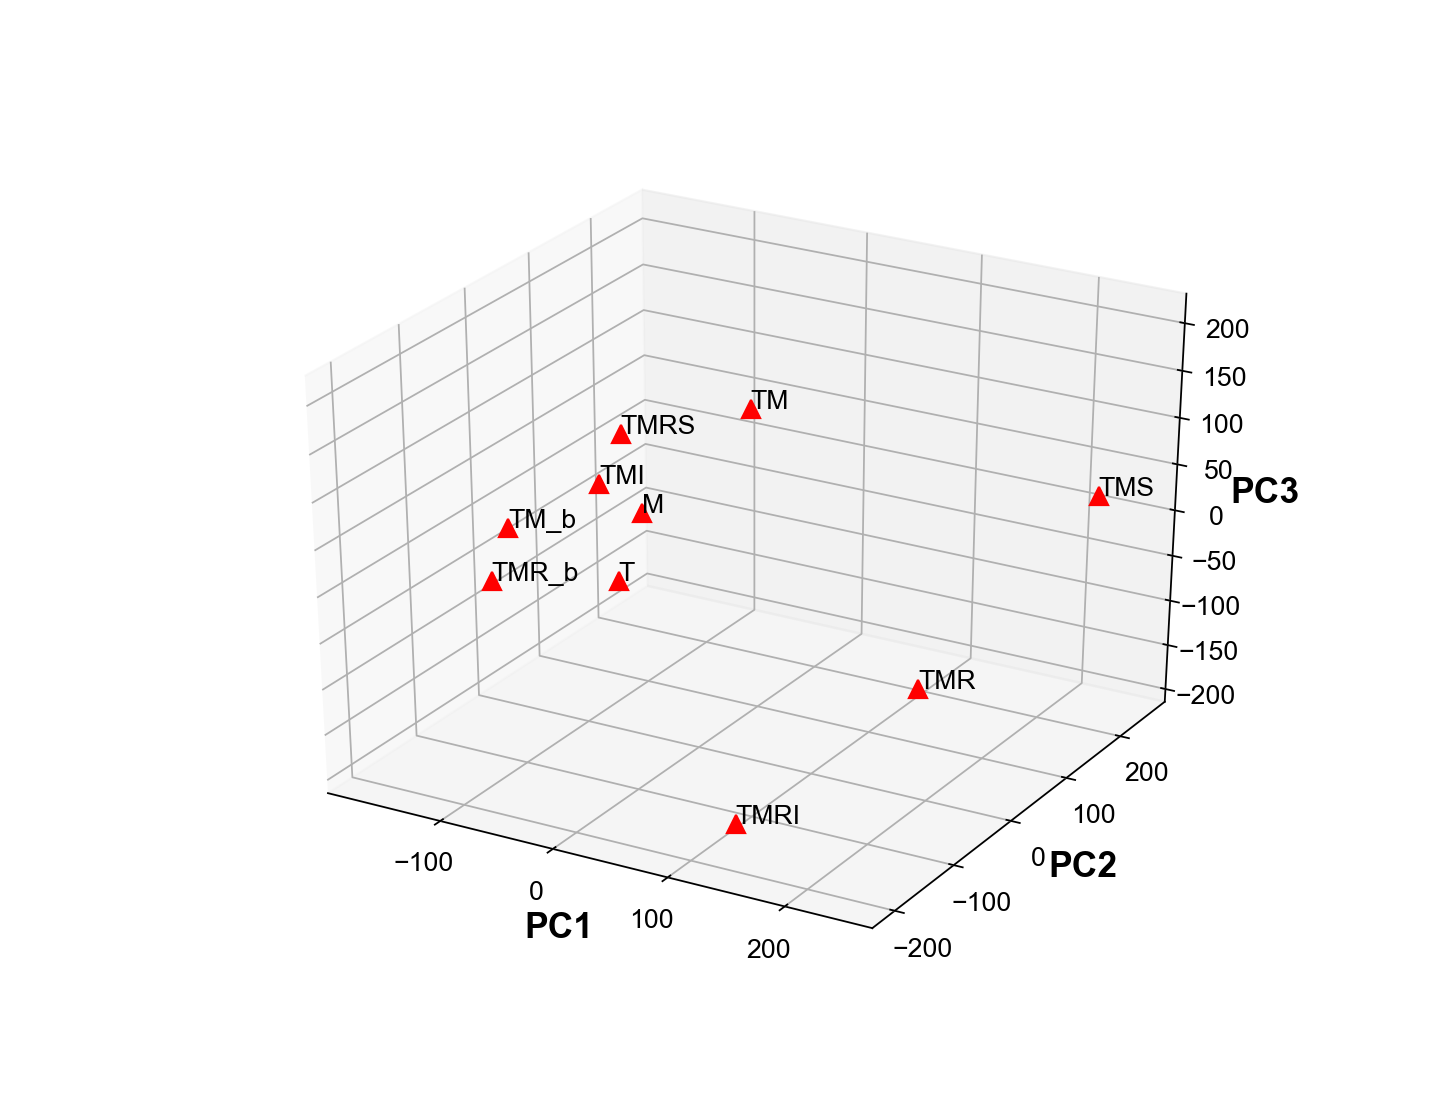

In [10]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot3D(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],PCA_pert.iloc[:,2],'^',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

for smpl in PCA_pert.index:
    ax.text(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1],PCA_pert.loc[smpl][2],smpl)

plt.show()


In [11]:
gene_names = list(set(WTvsMUT.index) & set(lFC_names.index))
print(len(gene_names))

WTvsMUT_com = WTvsMUT.loc[gene_names]
logfc_com = lFC_names.loc[gene_names]
logfc_com = logfc_com[~logfc_com.index.duplicated(keep='first')]
total_dataset_com = pd.concat([WTvsMUT_com,logfc_com],axis=1,sort=True)

total_dataset_com.at[:,'DMSO']=np.zeros(len(gene_names))

total_dataset_com


3845


,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1,M,T,TM,TMR,TMI,TMRI,TM_b,TMR_b,TMS,TMRS,DMSO
gene,,,,,,,,,,,,,,,,,
A230028O05Rik,0.000000,1.137350,1.274580,0.000000,1.203960,0.000000,-0.344753,-1.208658,-0.645691,0.681519,-0.168410,0.887386,0.055530,0.112692,-1.198454,0.110238,0.0
A230050P20Rik,0.000000,0.000000,1.263020,0.000000,1.300780,1.479910,0.626012,0.319772,0.527822,-0.020704,0.349538,-0.115576,0.465089,0.028708,0.575537,0.176448,0.0
A230059L01Rik,0.000000,0.000000,-2.106410,0.000000,0.000000,0.000000,1.205018,-1.675260,2.814648,0.653824,-1.637400,-1.831765,1.997804,-0.772329,-1.596459,-1.747745,0.0
A430046D13Rik,0.000000,-1.204380,-2.853830,0.000000,-1.317190,0.000000,-0.316958,-0.243272,-0.648745,-0.453289,-0.566486,-0.448085,-0.491658,-0.603838,-0.681684,-0.536290,0.0
A430108G06Rik,-1.469380,-4.483050,0.000000,-1.560030,-3.569200,0.000000,-0.130977,0.369204,0.167843,-1.771092,0.265944,-1.885078,0.153984,-1.806361,0.158810,-1.452822,0.0
A530017D24Rik,0.000000,0.000000,-1.317080,0.000000,0.000000,0.000000,-0.271720,-0.403598,-0.551608,-1.041514,-0.363070,-1.264092,-0.492014,-1.112651,-0.485658,-1.199617,0.0
A530064D06Rik,0.000000,0.000000,1.447580,0.000000,2.475340,2.325100,1.056433,0.687063,0.767477,3.274927,0.935696,3.077151,0.598108,3.418895,0.906521,3.140819,0.0
AA414768,0.000000,0.000000,1.203580,0.000000,1.214640,1.455350,0.380318,0.340969,0.701065,2.263205,0.145991,2.239093,0.619470,2.333725,0.643198,2.418885,0.0
AC132444.1,0.000000,0.000000,0.000000,0.000000,1.862280,0.000000,-0.064429,-0.529230,0.075576,-0.820289,0.589527,-0.145724,-0.243227,-0.303869,-0.045664,-0.522069,0.0


In [12]:
pcat = PCA(n_components=3)
Spca = pcat.fit_transform(total_dataset_com.transpose())
print("Explained variances by components: ", pcat.explained_variance_ratio_, "total variance explained: ",sum(pcat.explained_variance_ratio_))
PCA_total = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=total_dataset_com.columns)
PCA_total

Explained variances by components:  [0.46877711 0.21643023 0.07189773] total variance explained:  0.7571050784226009


,PC1,PC2,PC3
B6_2ng_B6_NT1,4.522803,-26.127469,-6.085774
B6_10ng_B6_NT1,50.689207,7.657049,-14.446582
B6_50ng_B6_NT1,100.047411,27.912318,42.808918
1h_2ng_1h_NT1,8.172032,-25.710403,-8.733145
1h_10ng_1h_NT1,56.963900,9.160904,-34.107412
1h_50ng_1h_NT1,49.814269,-14.613537,-15.257106
M,0.017691,-19.620361,0.514439
T,-23.334642,-27.396268,11.245550
TM,-24.436751,-18.573408,10.528073
TMR,-33.431835,45.039391,-4.050619


<IPython.core.display.Javascript object>


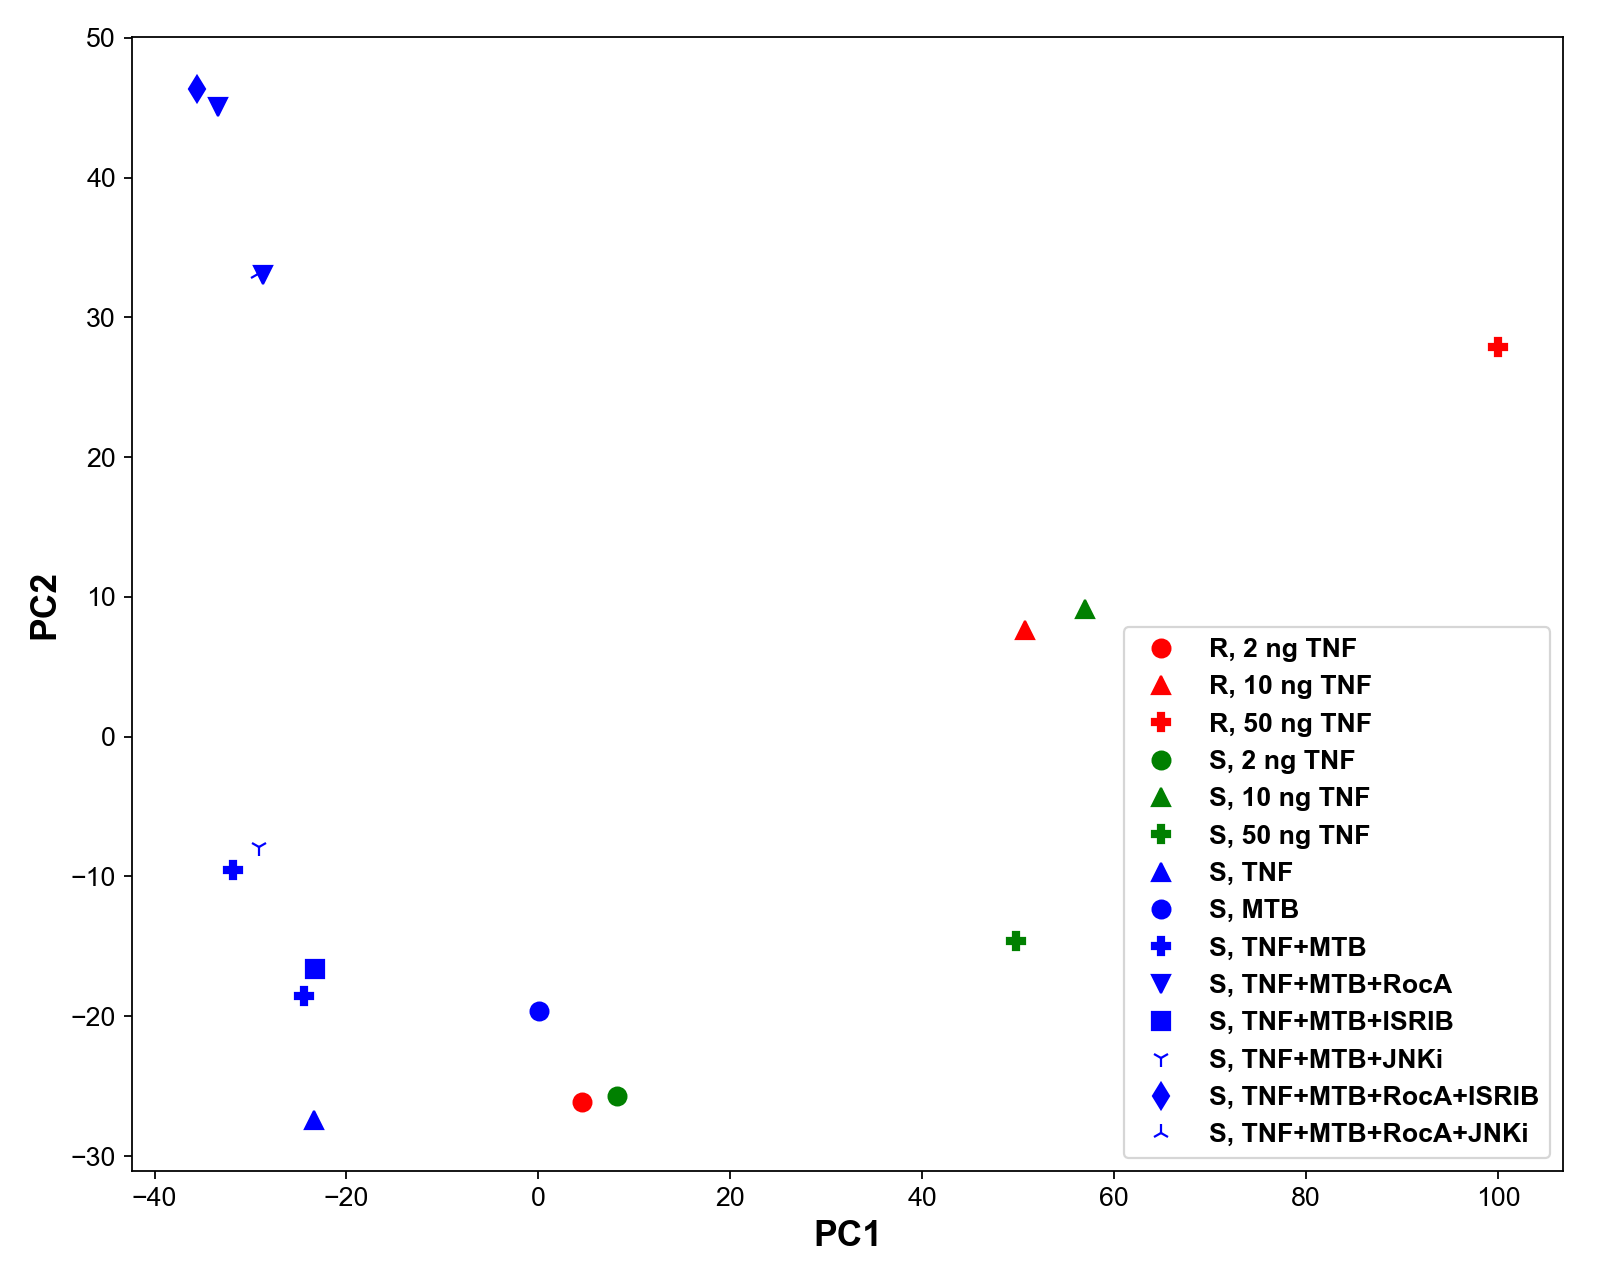

In [13]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(PCA_total.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_total.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='R, 2 ng TNF',ms=8) 
ax.plot(PCA_total.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_total.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='R, 10 ng TNF',ms=8) 
ax.plot(PCA_total.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_total.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='R, 50 ng TNF',ms=8) 

ax.plot(PCA_total.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_total.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='S, 2 ng TNF',ms=8) 
ax.plot(PCA_total.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_total.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='S, 10 ng TNF',ms=8) 
ax.plot(PCA_total.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_total.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='S, 50 ng TNF',ms=8) 

ax.plot(PCA_total.filter(regex='^T$',axis=0).iloc[:,0],PCA_total.filter(regex='^T$',axis=0).iloc[:,1],'^',color='blue',label='S, TNF',ms=8) 
ax.plot(PCA_total.filter(regex='^M$',axis=0).iloc[:,0],PCA_total.filter(regex='^M$',axis=0).iloc[:,1],'o',color='blue',label='S, MTB',ms=8) 
ax.plot([float(PCA_total.filter(regex='^TM$',axis=0).iloc[:,0]),float(PCA_total.filter(regex='^TM_b$',axis=0).iloc[:,0])],[float(PCA_total.filter(regex='^TM$',axis=0).iloc[:,1]),float(PCA_total.filter(regex='^TM_b$',axis=0).iloc[:,1])],'P',color='blue',label='S, TNF+MTB',ms=8) 
ax.plot([float(PCA_total.filter(regex='^TMR$',axis=0).iloc[:,0]),float(PCA_total.filter(regex='^TMR_b$',axis=0).iloc[:,0])],[float(PCA_total.filter(regex='^TMR$',axis=0).iloc[:,1]),float(PCA_total.filter(regex='^TMR_b$',axis=0).iloc[:,1])],'v',color='blue',label='S, TNF+MTB+RocA',ms=8) 
ax.plot(PCA_total.filter(regex='^TMI$',axis=0).iloc[:,0],PCA_total.filter(regex='^TMI$',axis=0).iloc[:,1],'s',color='blue',label='S, TNF+MTB+ISRIB',ms=8) 
ax.plot(PCA_total.filter(regex='^TMS$',axis=0).iloc[:,0],PCA_total.filter(regex='^TMS$',axis=0).iloc[:,1],'1',color='blue',label='S, TNF+MTB+JNKi',ms=8) 
ax.plot(PCA_total.filter(regex='^TMRI$',axis=0).iloc[:,0],PCA_total.filter(regex='^TMRI$',axis=0).iloc[:,1],'d',color='blue',label='S, TNF+MTB+RocA+ISRIB',ms=8) 
ax.plot(PCA_total.filter(regex='^TMRS$',axis=0).iloc[:,0],PCA_total.filter(regex='^TMRS$',axis=0).iloc[:,1],'2',color='blue',label='S, TNF+MTB+RocA+JNKi',ms=8) 



ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)

ax.legend(numpoints=1,prop=fontAxes)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


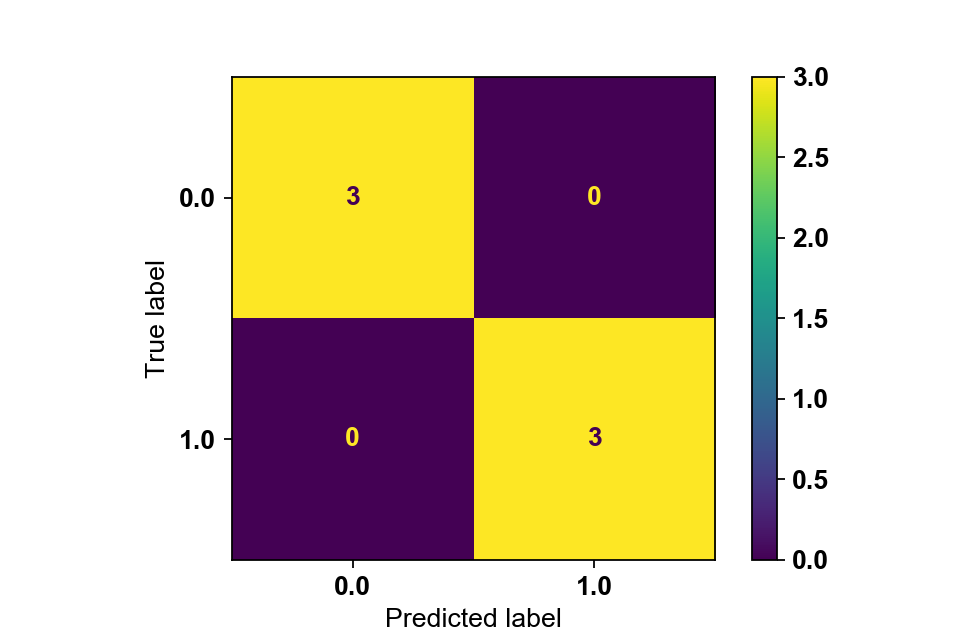

In [14]:
WT_samples = total_dataset_com.filter(regex='B6')
mut_samples = total_dataset_com.filter(regex='1h')

learn_samples = pd.concat([WT_samples,mut_samples],axis=1)
cls = list(np.zeros(len(WT_samples.columns))) + list(np.ones(len(mut_samples.columns)))

svc_TB = SVC(kernel='linear')
svc_TB.fit(learn_samples.transpose(),cls)
norm_vec_TB = - svc_TB.coef_[0]/linalg.norm(svc_TB.coef_[0])
b_coef_TB = svc_TB.intercept_[0]/linalg.norm(svc_TB.coef_[0])

plot_confusion_matrix(svc_TB,learn_samples.transpose(),cls)


<IPython.core.display.Javascript object>


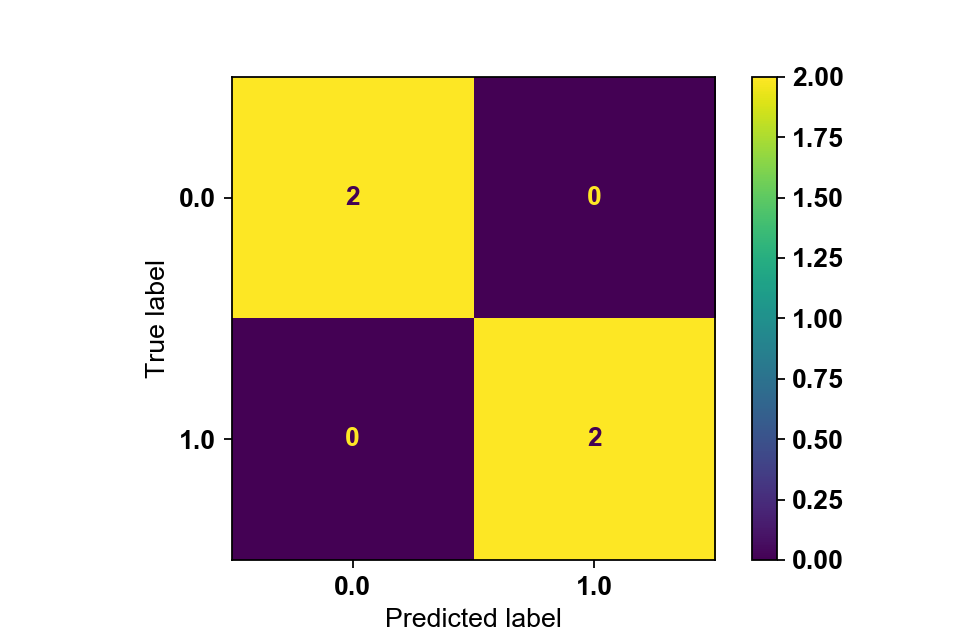

In [15]:
low_samples = total_dataset_com.filter(regex='2ng')
high_samples = total_dataset_com.filter(regex='50ng')

TNF_samples = pd.concat([low_samples,high_samples],axis=1)
cls_TNF = list(np.zeros(len(low_samples.columns))) + list(np.ones(len(high_samples.columns)))

svc_TNF = SVC(kernel='linear')
svc_TNF.fit(TNF_samples.transpose(),cls_TNF)
norm_vec_TNF = svc_TNF.coef_[0]/linalg.norm(svc_TNF.coef_[0])
b_coef_TNF = -svc_TNF.intercept_[0]/linalg.norm(svc_TNF.coef_[0])

plot_confusion_matrix(svc_TNF,TNF_samples.transpose(),cls_TNF)


In [16]:

norm_vec_2D_df = pd.DataFrame(np.array([norm_vec_TNF,norm_vec_TB]),columns=total_dataset_com.index,index=['norm_vec_TNF','norm_vec_TB']).T
norm_vec_2D_df.to_csv('STV_2D.csv')
angle_n_vecs = (np.arccos(np.dot(norm_vec_TNF,norm_vec_TB))/np.pi)*180
print(angle_n_vecs)


89.9999976950594


In [17]:
DPDs_2D_TB = pd.DataFrame(np.zeros((len(total_dataset_com.columns),4)),index=total_dataset_com.columns,columns=['DPD_TNF','DPD_TB','err_DPD_TNF','err_DPD_TB'])

for smpl in total_dataset_com.columns:
    DPDs_2D_TB.at[smpl,'DPD_TNF'] = - (b_coef_TNF - np.dot(total_dataset_com[smpl],norm_vec_2D_df['norm_vec_TNF']))
    DPDs_2D_TB.at[smpl,'DPD_TB'] = - (b_coef_TB - np.dot(total_dataset_com[smpl],norm_vec_2D_df['norm_vec_TB']))
     
for smpl in col_names:
    DPDs_2D_TB.at[smpl,'err_DPD_TNF'] = np.abs(DPDs_2D_TB.loc[smpl,'DPD_TNF']*DPD_counts_df.loc[smpl,'err_DPD_TNF'])
    DPDs_2D_TB.at[smpl,'err_DPD_TB'] = np.abs(DPDs_2D_TB.loc[smpl,'DPD_TB']*DPD_counts_df.loc[smpl,'err_DPD_TB'])
    
        
DPDs_2D_TB.to_csv('DPDs_TB.csv')
DPDs_2D_TB


,DPD_TNF,DPD_TB,err_DPD_TNF,err_DPD_TB
B6_2ng_B6_NT1,-36.124596,12.483646,0.000000,0.000000
B6_10ng_B6_NT1,-2.970311,12.478412,0.000000,0.000000
B6_50ng_B6_NT1,35.080527,12.490171,0.000000,0.000000
1h_2ng_1h_NT1,-34.644971,-12.486331,0.000000,0.000000
1h_10ng_1h_NT1,12.688983,-12.479563,0.000000,0.000000
1h_50ng_1h_NT1,34.644974,-12.486329,0.000000,0.000000
M,-21.650368,-4.051268,2.892742,2.516041
T,-40.632596,-0.133683,18.170494,7.084600
TM,-39.846451,0.782605,0.384789,0.309382
TMR,-36.416196,2.587212,0.494060,0.105053


<IPython.core.display.Javascript object>


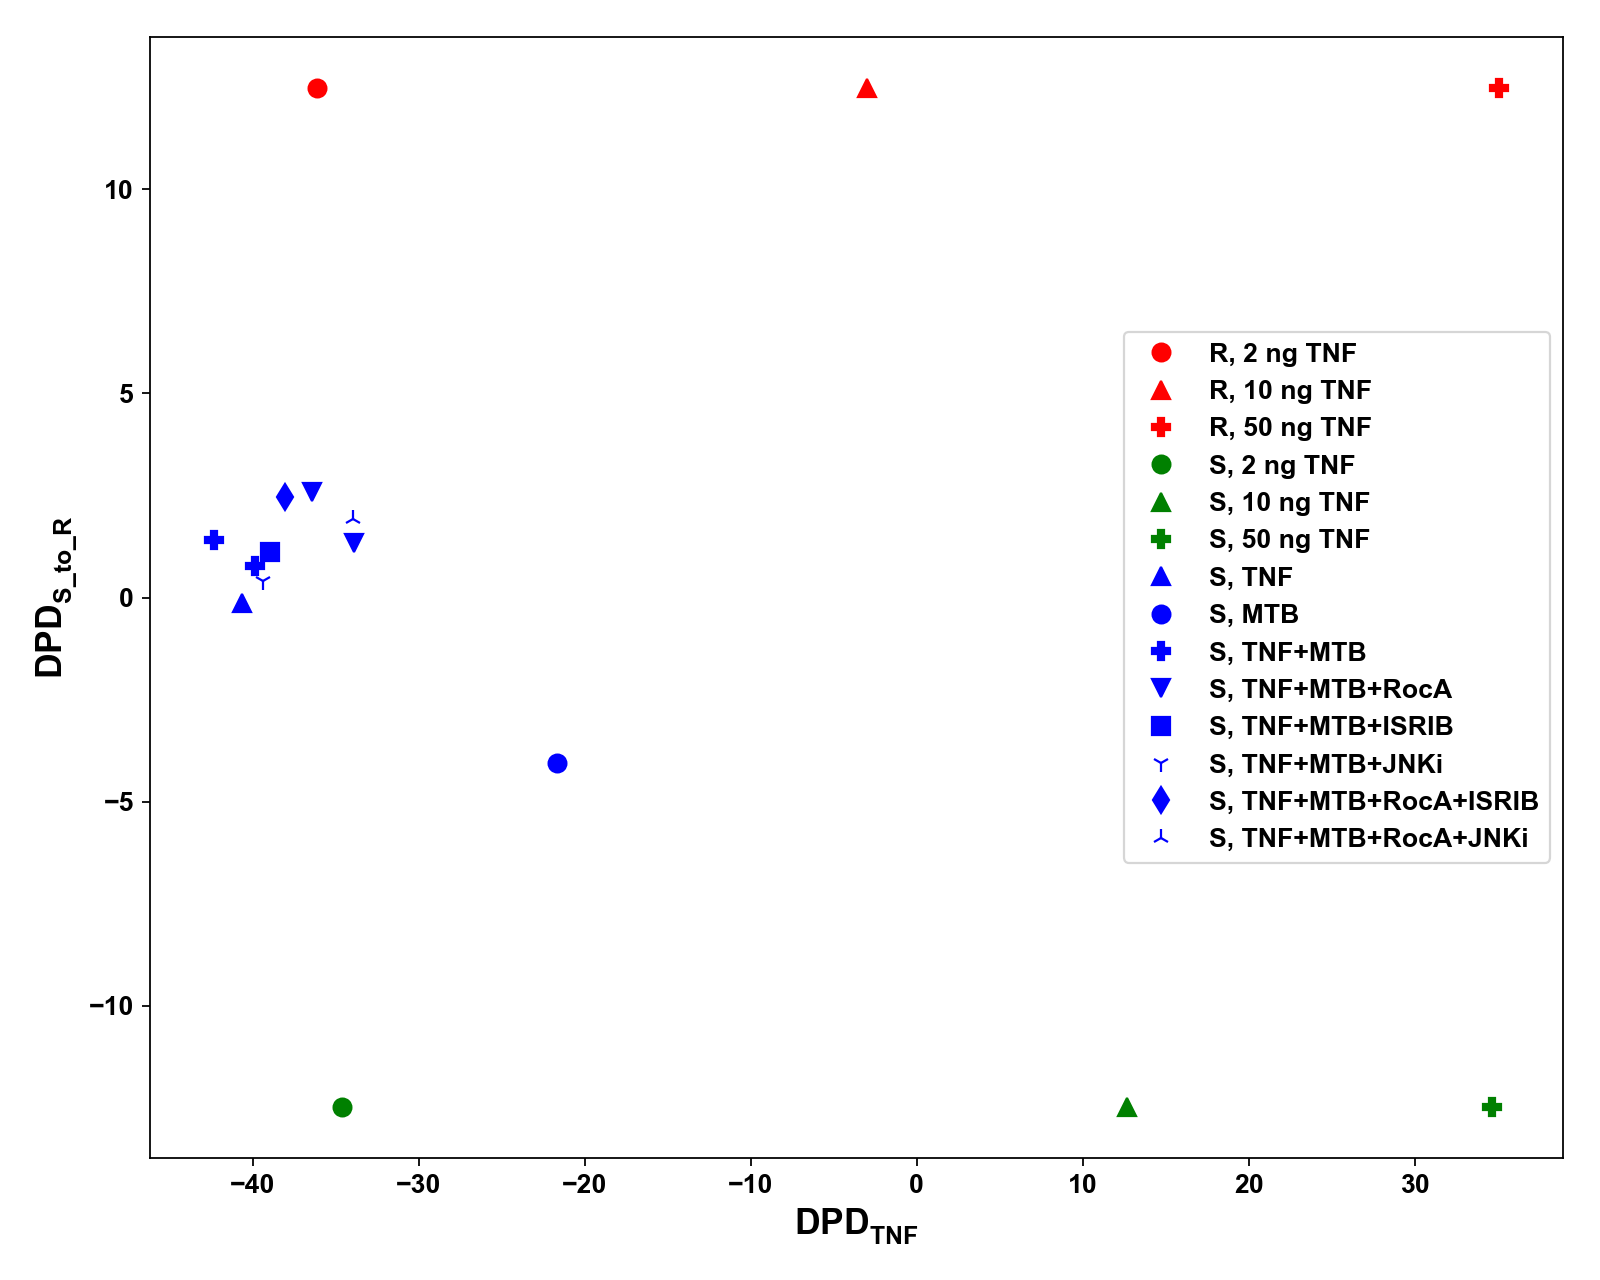

In [18]:
fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)


ax.plot(DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='R, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='R, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='R, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='S, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='S, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='S, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,1],'^',color='blue',label='S, TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,1],'o',color='blue',label='S, MTB',ms=8) 
ax.plot([float(DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,0]),float(DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,0])],[float(DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,1]),float(DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,1])],'P',color='blue',label='S, TNF+MTB',ms=8) 
ax.plot([float(DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,0]),float(DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,0])],[float(DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,1]),float(DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,1])],'v',color='blue',label='S, TNF+MTB+RocA',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,1],'s',color='blue',label='S, TNF+MTB+ISRIB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,1],'1',color='blue',label='S, TNF+MTB+JNKi',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,1],'d',color='blue',label='S, TNF+MTB+RocA+ISRIB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,1],'2',color='blue',label='S, TNF+MTB+RocA+JNKi',ms=8) 


ax.set_ylabel('$\mathregular{DPD_{S\_to\_R}}$',**fontLabel)
ax.set_xlabel('$\mathregular{DPD_{TNF}}$',**fontLabel)

ax.legend(numpoints=1,prop=fontAxes)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


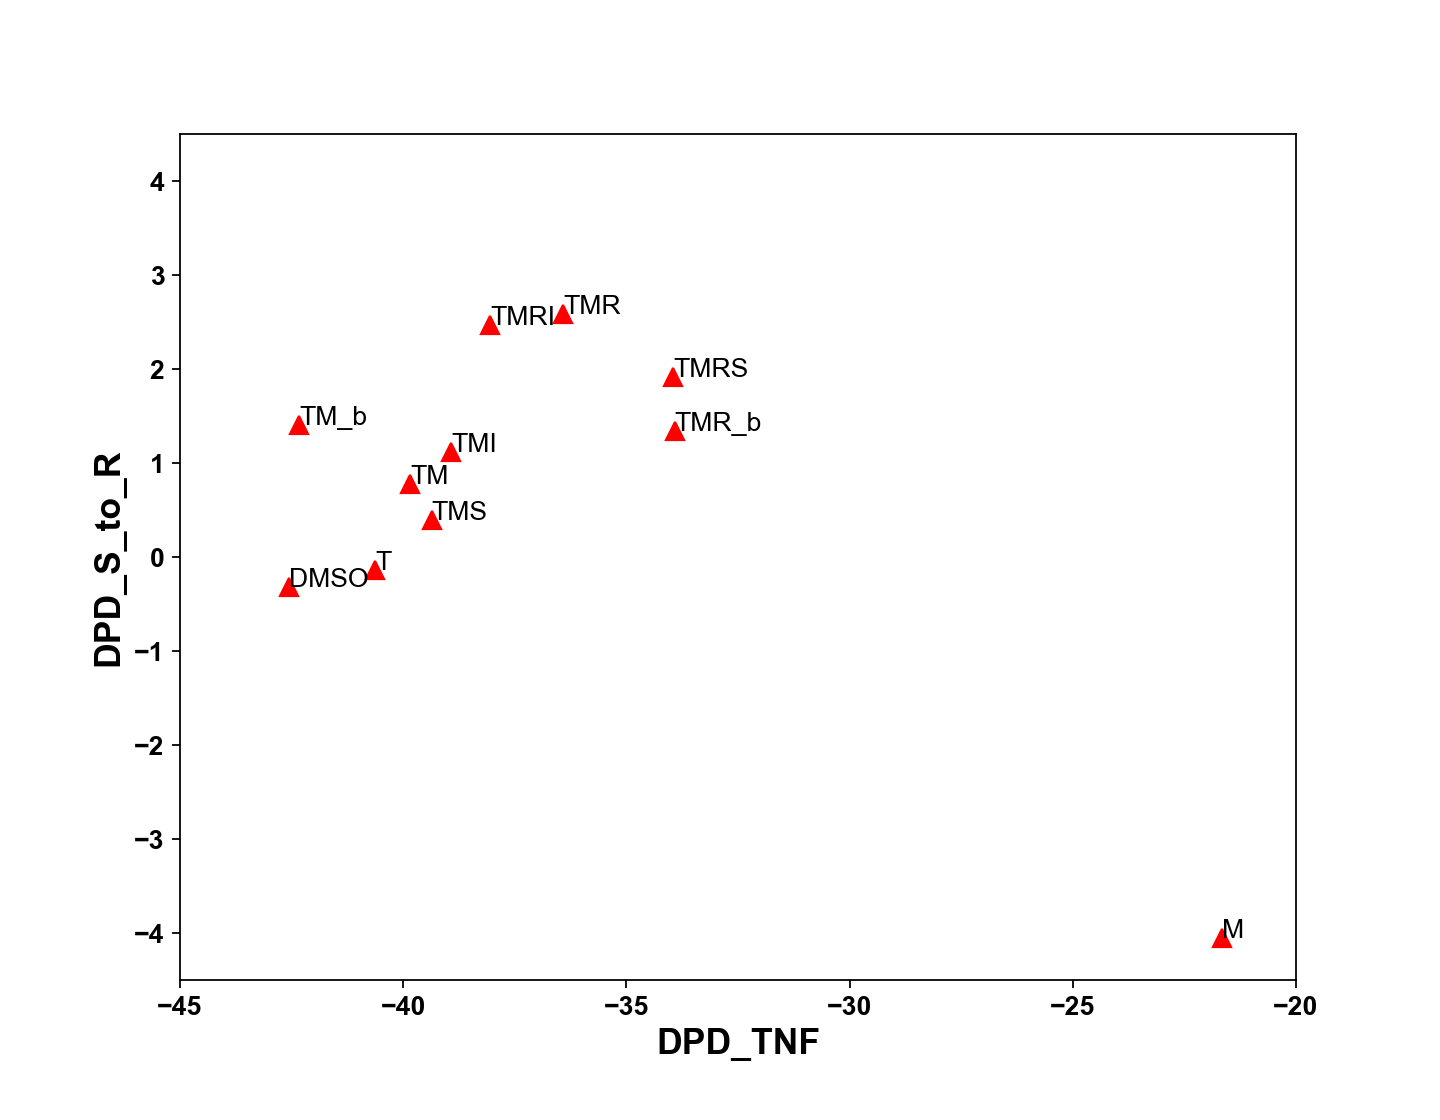

In [19]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.iloc[:,0],DPDs_2D_TB.iloc[:,1],'^',color='red',ms=8) 

ax.set_ylabel('DPD_S_to_R',**fontLabel)
ax.set_xlabel('DPD_TNF',**fontLabel)

for smpl in DPDs_2D_TB.index:
    ax.annotate(smpl,(DPDs_2D_TB.loc[smpl][0],DPDs_2D_TB.loc[smpl][1]))

plt.ylim(-4.5,4.5)
plt.xlim(-45,-20)
plt.show()


<IPython.core.display.Javascript object>


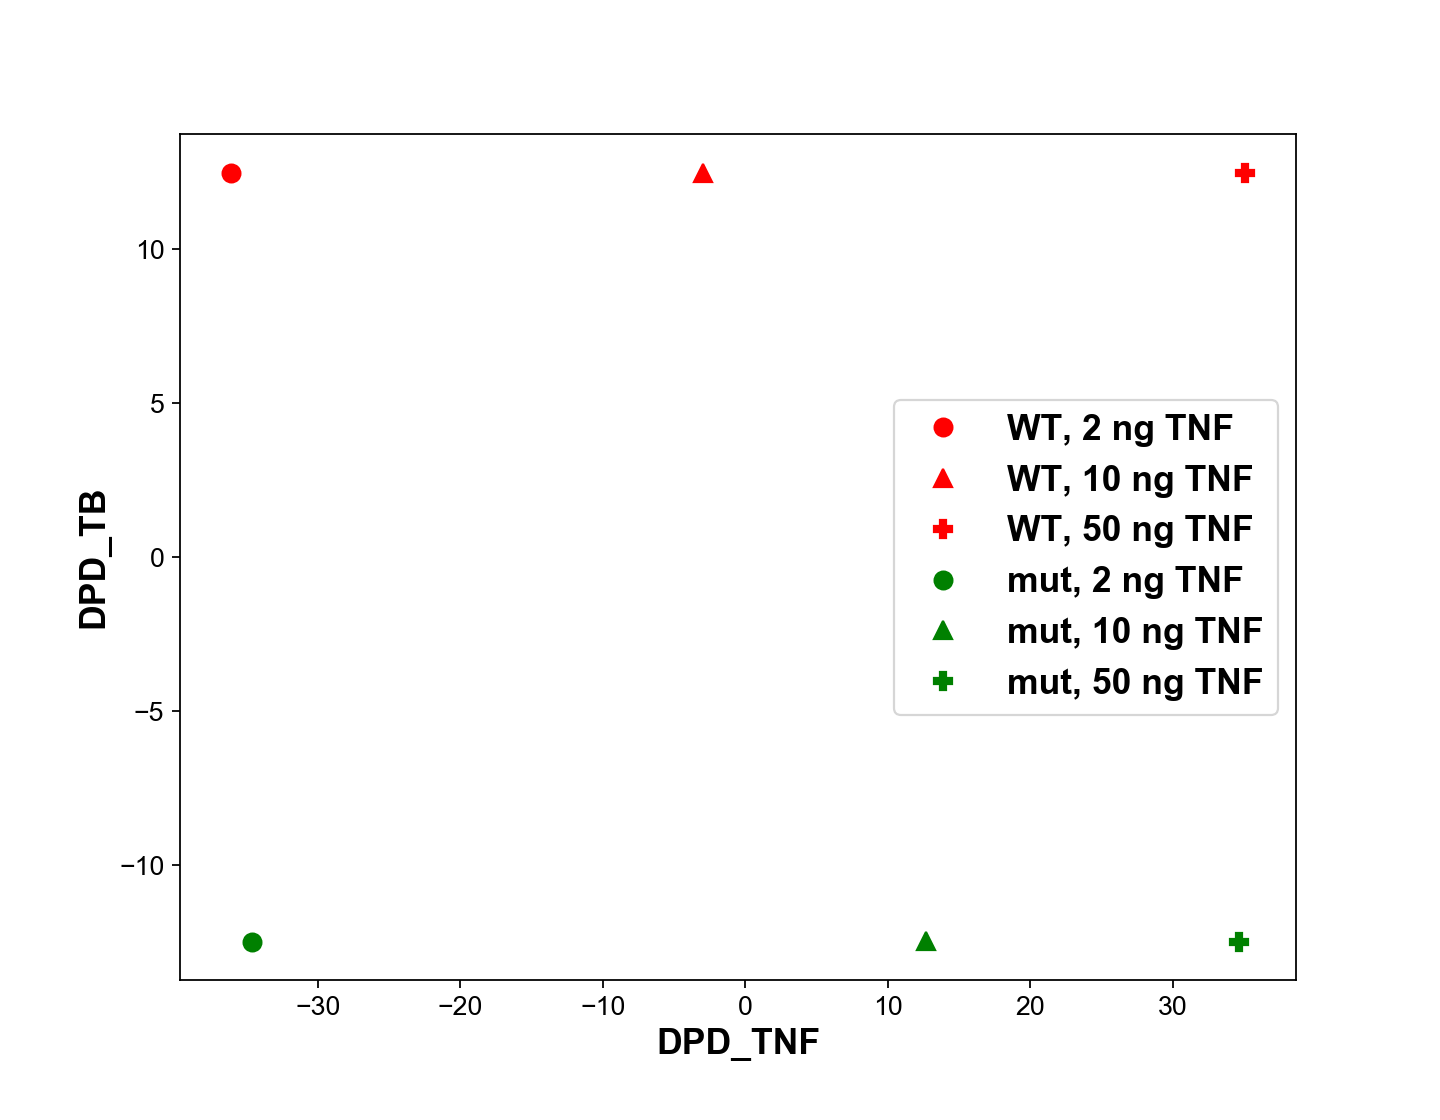

In [20]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='WT, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='WT, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='WT, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='mut, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='mut, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='mut, 50 ng TNF',ms=8) 

ax.set_xlabel('DPD_TNF',**fontLabel)
ax.set_ylabel('DPD_TB',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()


<IPython.core.display.Javascript object>


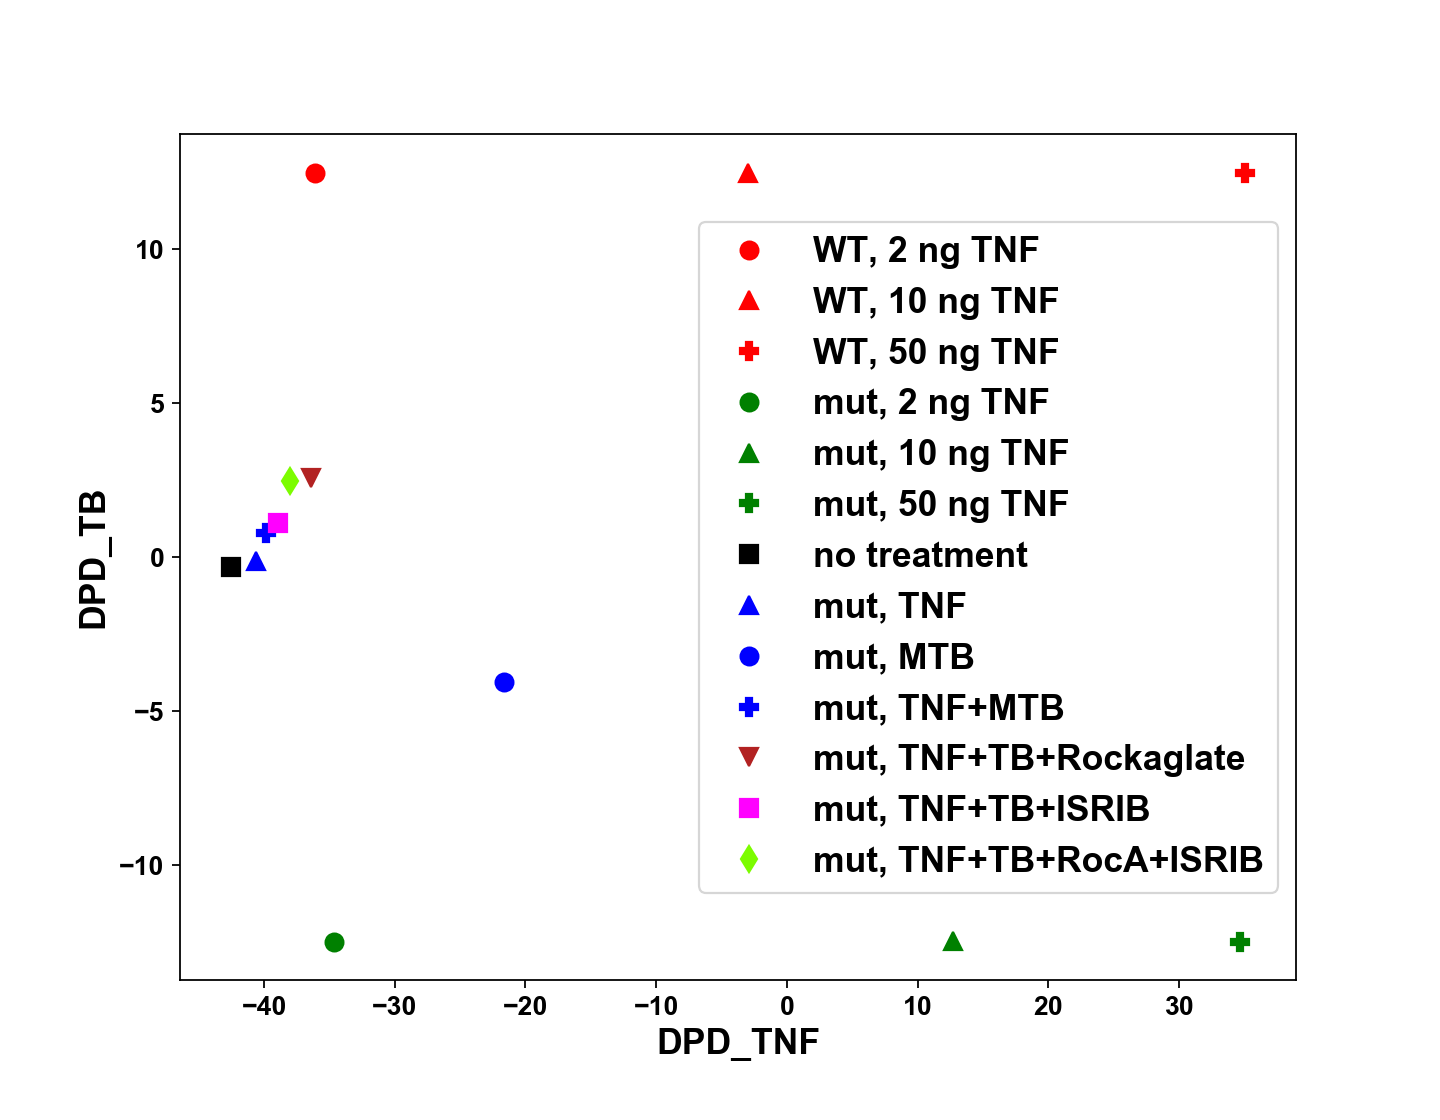

In [21]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='WT, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='WT, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='WT, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='mut, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='mut, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='mut, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,1],'s',color='black',label='no treatment',ms=8) 


ax.plot(DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,1],'^',color='blue',label='mut, TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,1],'o',color='blue',label='mut, MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,1],'P',color='blue',label='mut, TNF+MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,1],'v',color='firebrick',label='mut, TNF+TB+Rockaglate',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,1],'s',color='magenta',label='mut, TNF+TB+ISRIB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,1],'d',color='lawngreen',label='mut, TNF+TB+RocA+ISRIB',ms=8) 


ax.set_xlabel('DPD_TNF',**fontLabel)
ax.set_ylabel('DPD_TB',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()


<IPython.core.display.Javascript object>


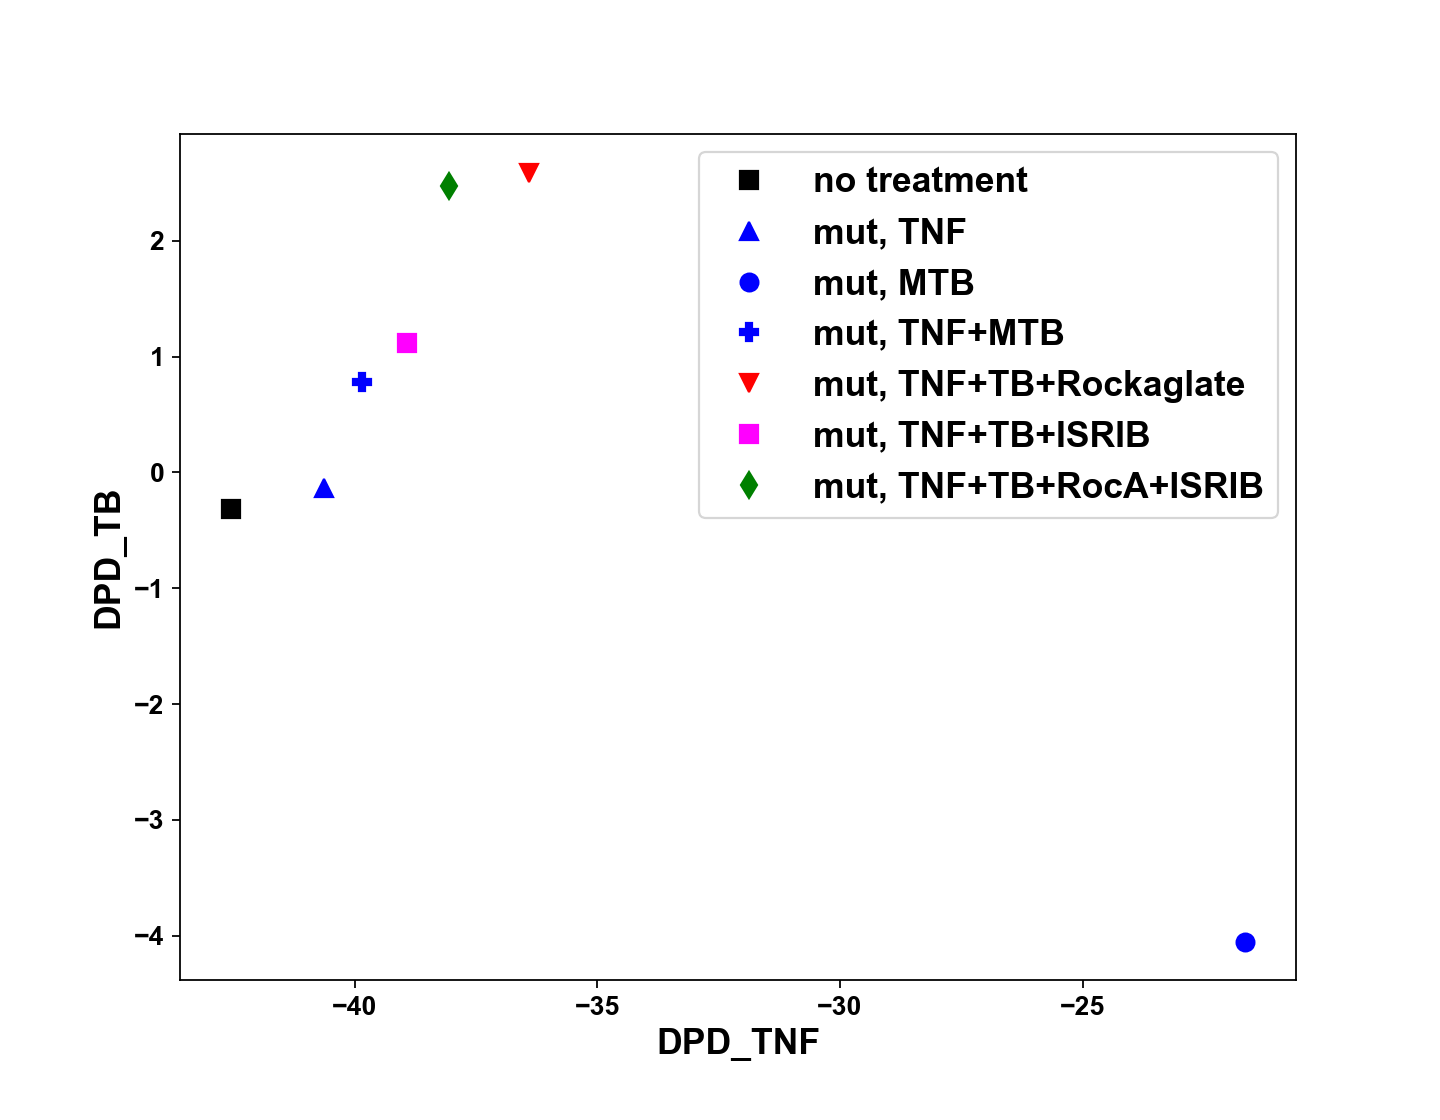

In [22]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,1],'s',color='black',label='no treatment',ms=8) 


ax.plot(DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^T$',axis=0).iloc[:,1],'^',color='blue',label='mut, TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^M$',axis=0).iloc[:,1],'o',color='blue',label='mut, MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TM$',axis=0).iloc[:,1],'P',color='blue',label='mut, TNF+MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMR$',axis=0).iloc[:,1],'v',color='red',label='mut, TNF+TB+Rockaglate',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMI$',axis=0).iloc[:,1],'s',color='magenta',label='mut, TNF+TB+ISRIB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRI$',axis=0).iloc[:,1],'d',color='green',label='mut, TNF+TB+RocA+ISRIB',ms=8) 

ax.set_xlabel('DPD_TNF',**fontLabel)
ax.set_ylabel('DPD_TB',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()



<IPython.core.display.Javascript object>


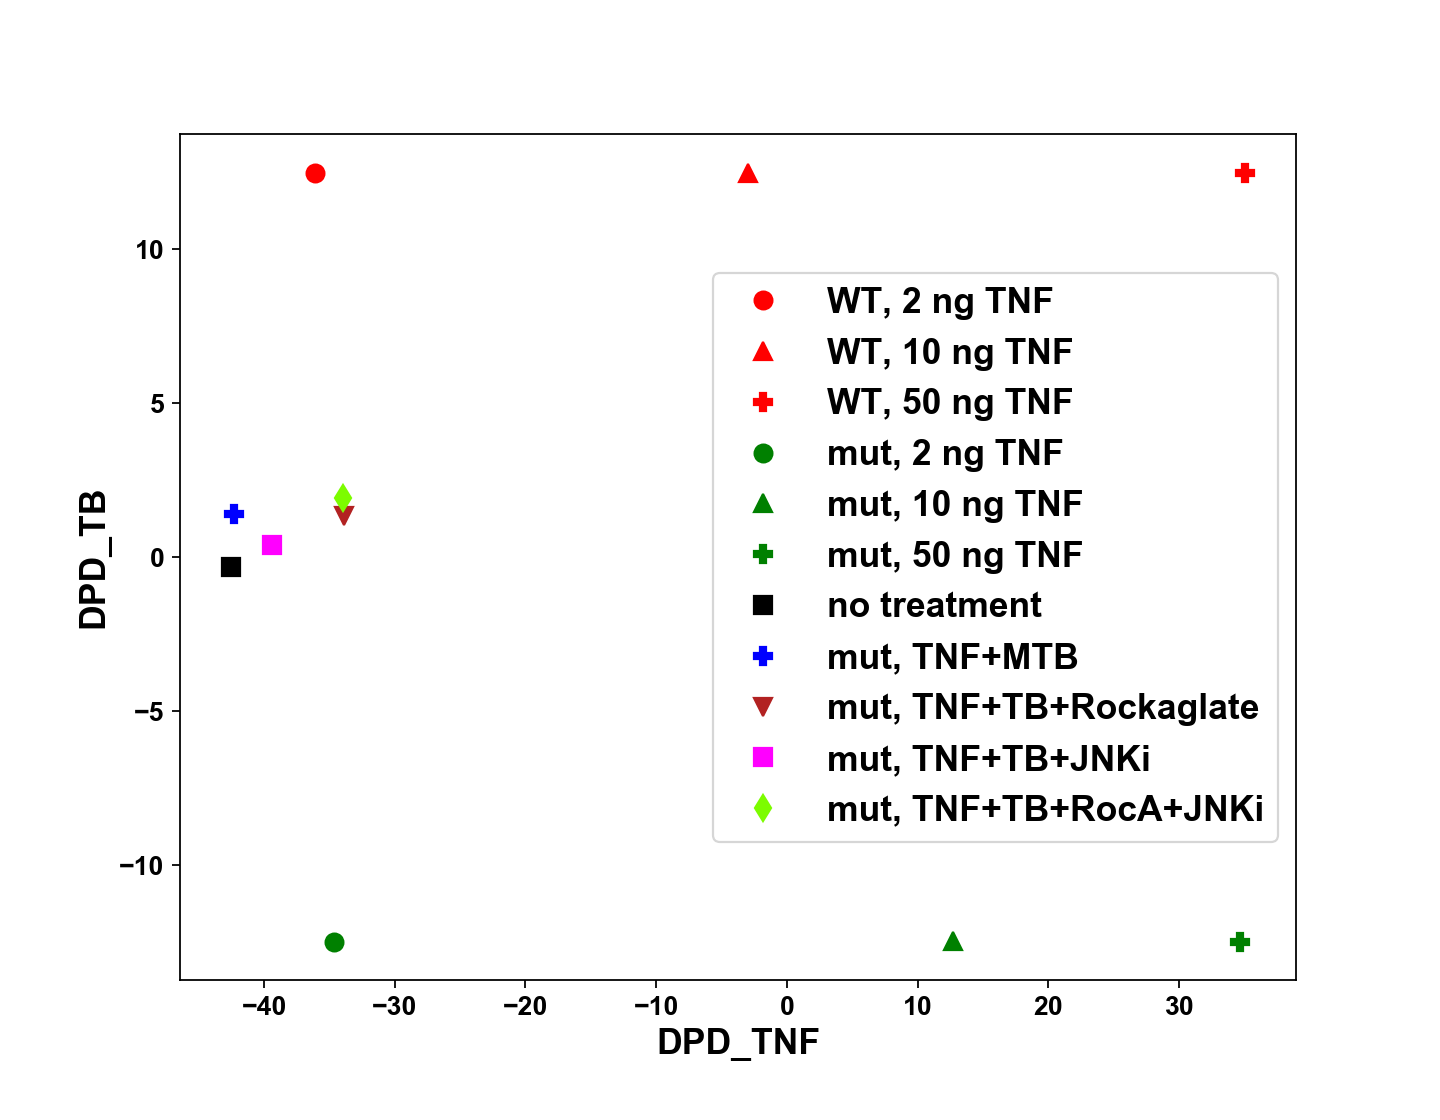

In [23]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='WT, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='WT, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='WT, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='mut, 2 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='mut, 10 ng TNF',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='mut, 50 ng TNF',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,1],'s',color='black',label='no treatment',ms=8) 


ax.plot(DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,1],'P',color='blue',label='mut, TNF+MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,1],'v',color='firebrick',label='mut, TNF+TB+Rockaglate',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,1],'s',color='magenta',label='mut, TNF+TB+JNKi',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,1],'d',color='lawngreen',label='mut, TNF+TB+RocA+JNKi',ms=8) 

ax.set_xlabel('DPD_TNF',**fontLabel)
ax.set_ylabel('DPD_TB',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()


<IPython.core.display.Javascript object>


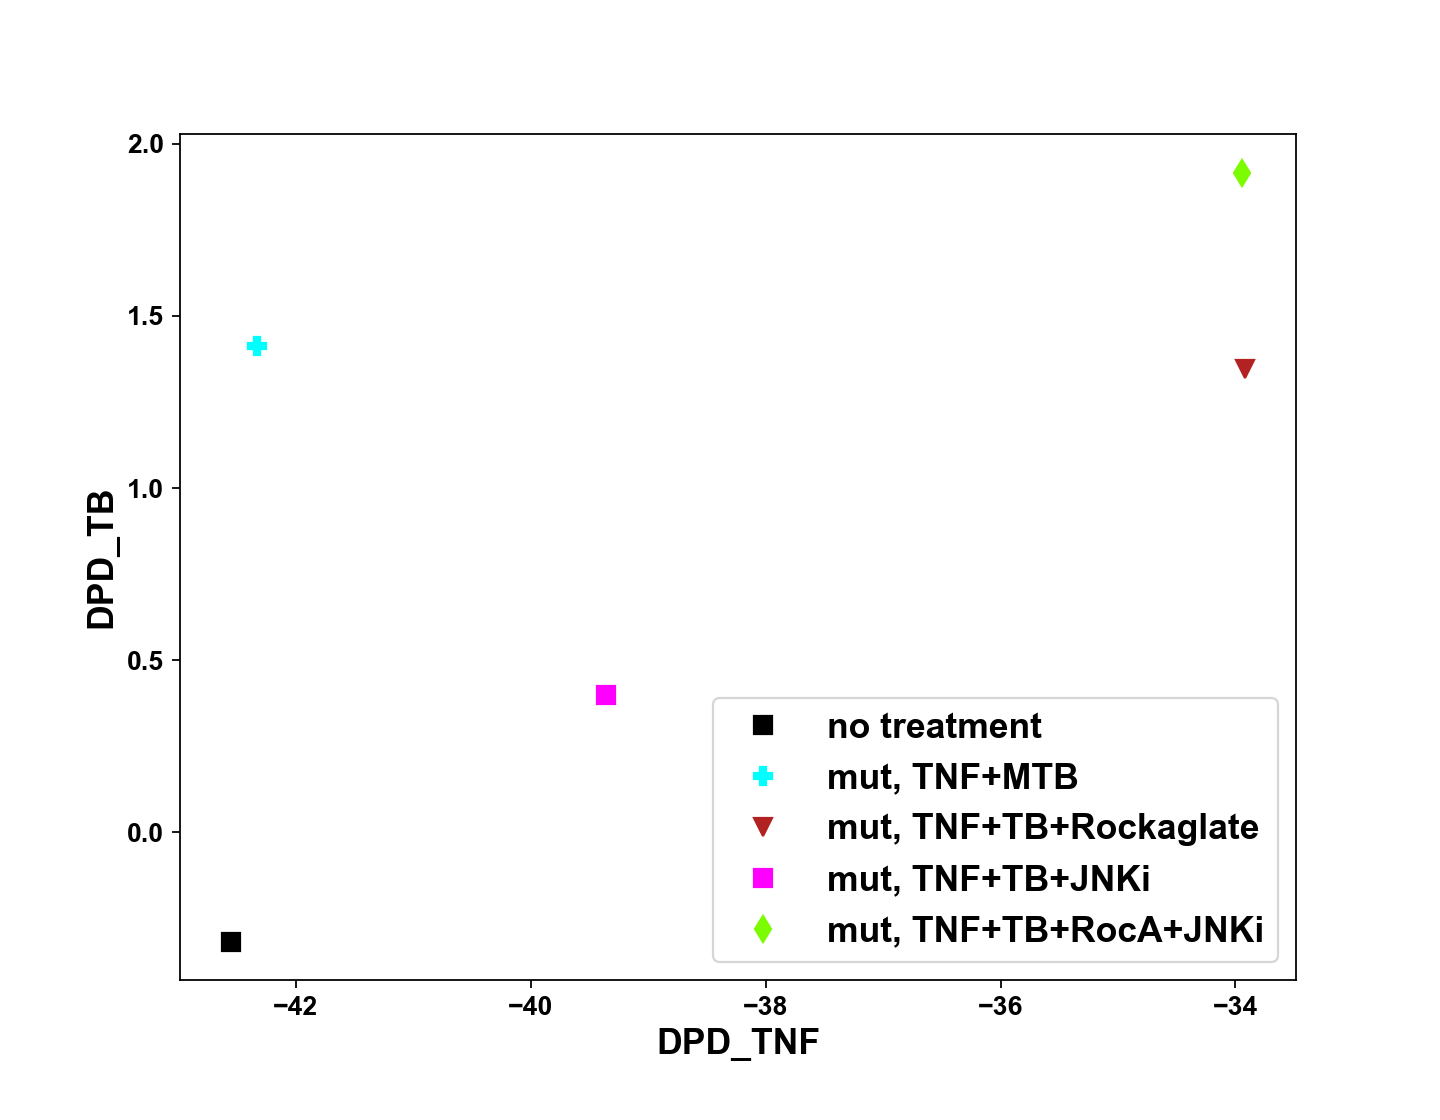

In [24]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='DMSO',axis=0).iloc[:,1],'s',color='black',label='no treatment',ms=8) 

ax.plot(DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TM_b$',axis=0).iloc[:,1],'P',color='cyan',label='mut, TNF+MTB',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMR_b$',axis=0).iloc[:,1],'v',color='firebrick',label='mut, TNF+TB+Rockaglate',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMS$',axis=0).iloc[:,1],'s',color='magenta',label='mut, TNF+TB+JNKi',ms=8) 
ax.plot(DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,0],DPDs_2D_TB.filter(regex='^TMRS$',axis=0).iloc[:,1],'d',color='lawngreen',label='mut, TNF+TB+RocA+JNKi',ms=8) 

ax.set_xlabel('DPD_TNF',**fontLabel)
ax.set_ylabel('DPD_TB',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()



<IPython.core.display.Javascript object>


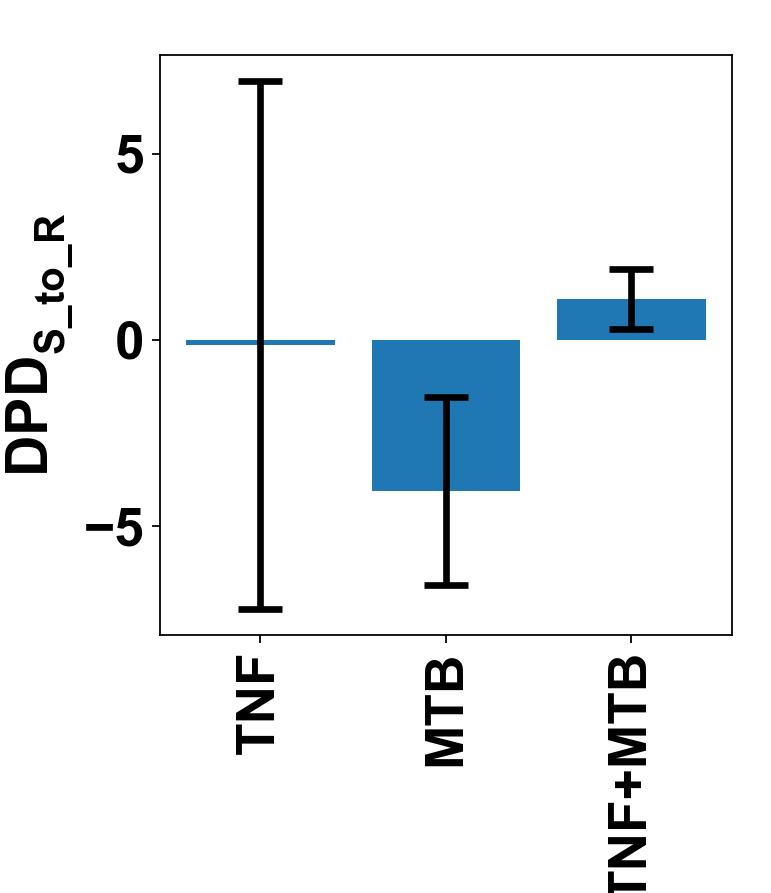

In [32]:

DPD_plot = [DPDs_2D_TB.loc['T','DPD_TB'],DPDs_2D_TB.loc['M','DPD_TB'],statistics.mean([DPDs_2D_TB.loc['TM','DPD_TB'],DPDs_2D_TB.loc['TM_b','DPD_TB']])]
errs_plot = [DPDs_2D_TB.loc['T','err_DPD_TB'],DPDs_2D_TB.loc['M','err_DPD_TB'],np.sqrt(DPDs_2D_TB.loc['TM','err_DPD_TB']**2 + DPDs_2D_TB.loc['TM_b','err_DPD_TB']**2)]


names = ['TNF','MTB','TNF+MTB']
values = DPD_plot
errs = errs_plot

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 28} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 26} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 24} 
plt.rc('font', **fontAxes)

plt.ylabel('$\mathregular{DPD_{S\_to\_R}}$',**fontLabel)
plt.bar(names,values,yerr=errs, error_kw=dict(lw=3, capsize=10, capthick=3))
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


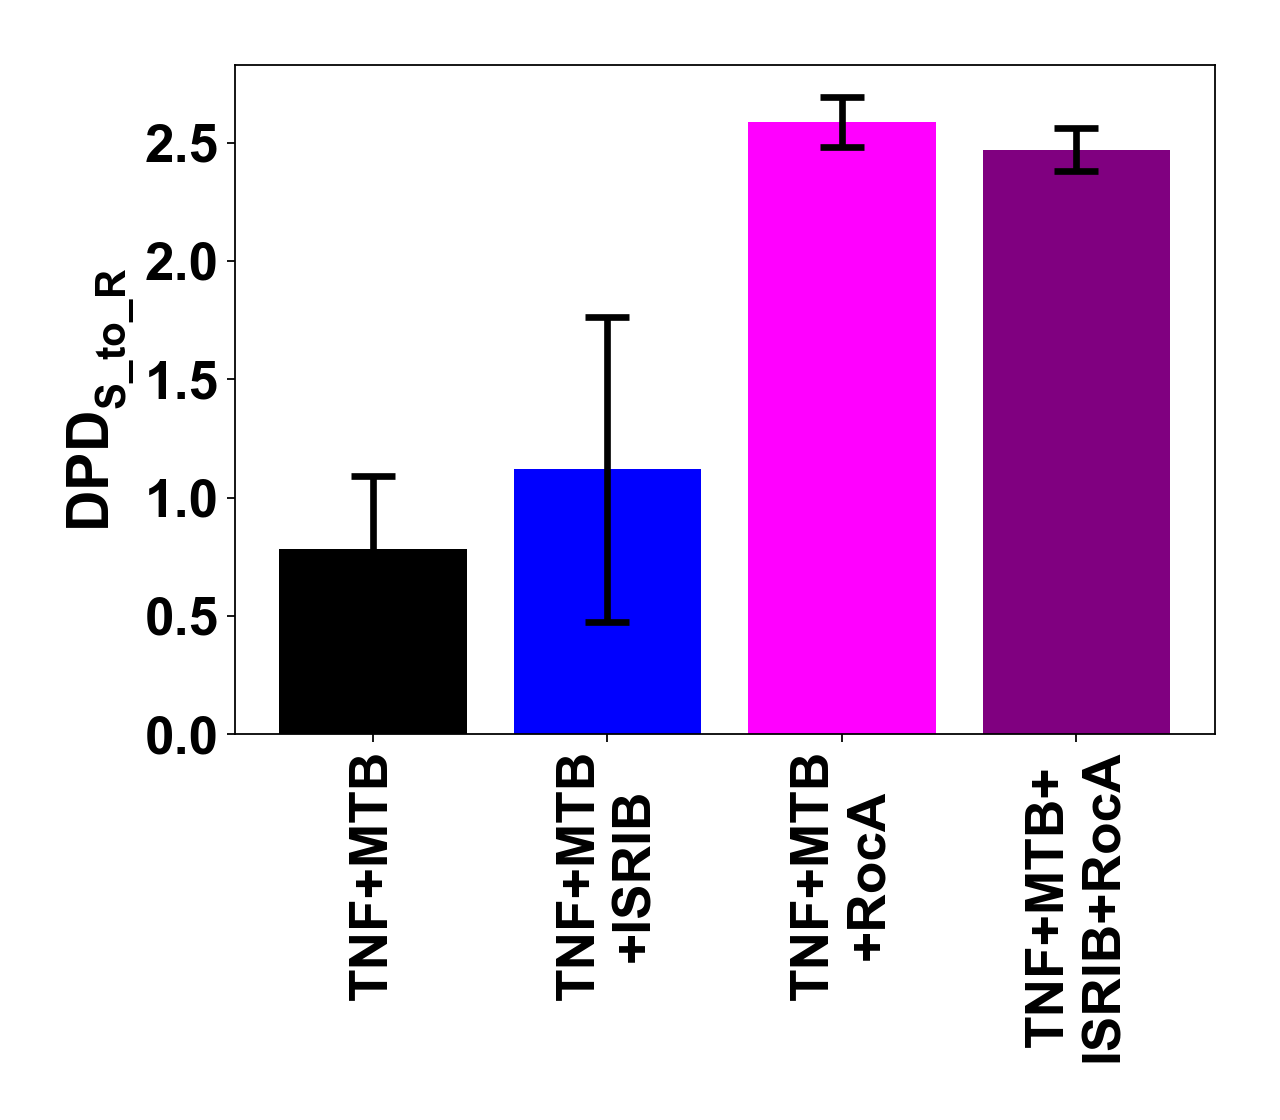

In [26]:

samples=['TM','TMI','TMR','TMRI']

DPD_plot = DPDs_2D_TB.loc[samples,'DPD_TB']
errs_plot = DPDs_2D_TB.loc[samples,'err_DPD_TB']

names = ['TNF+MTB','TNF+MTB\n+ISRIB','TNF+MTB\n+RocA','TNF+MTB+\nISRIB+RocA']
values = DPD_plot
errs = errs_plot

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 28} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 26} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 24} 
plt.rc('font', **fontAxes)

plt.ylabel('$\mathregular{DPD_{S\_to\_R}}$',**fontLabel)
plt.bar(names,values,yerr=errs, error_kw=dict(lw=3, capsize=10, capthick=3),color=['black','blue','magenta','purple'])
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


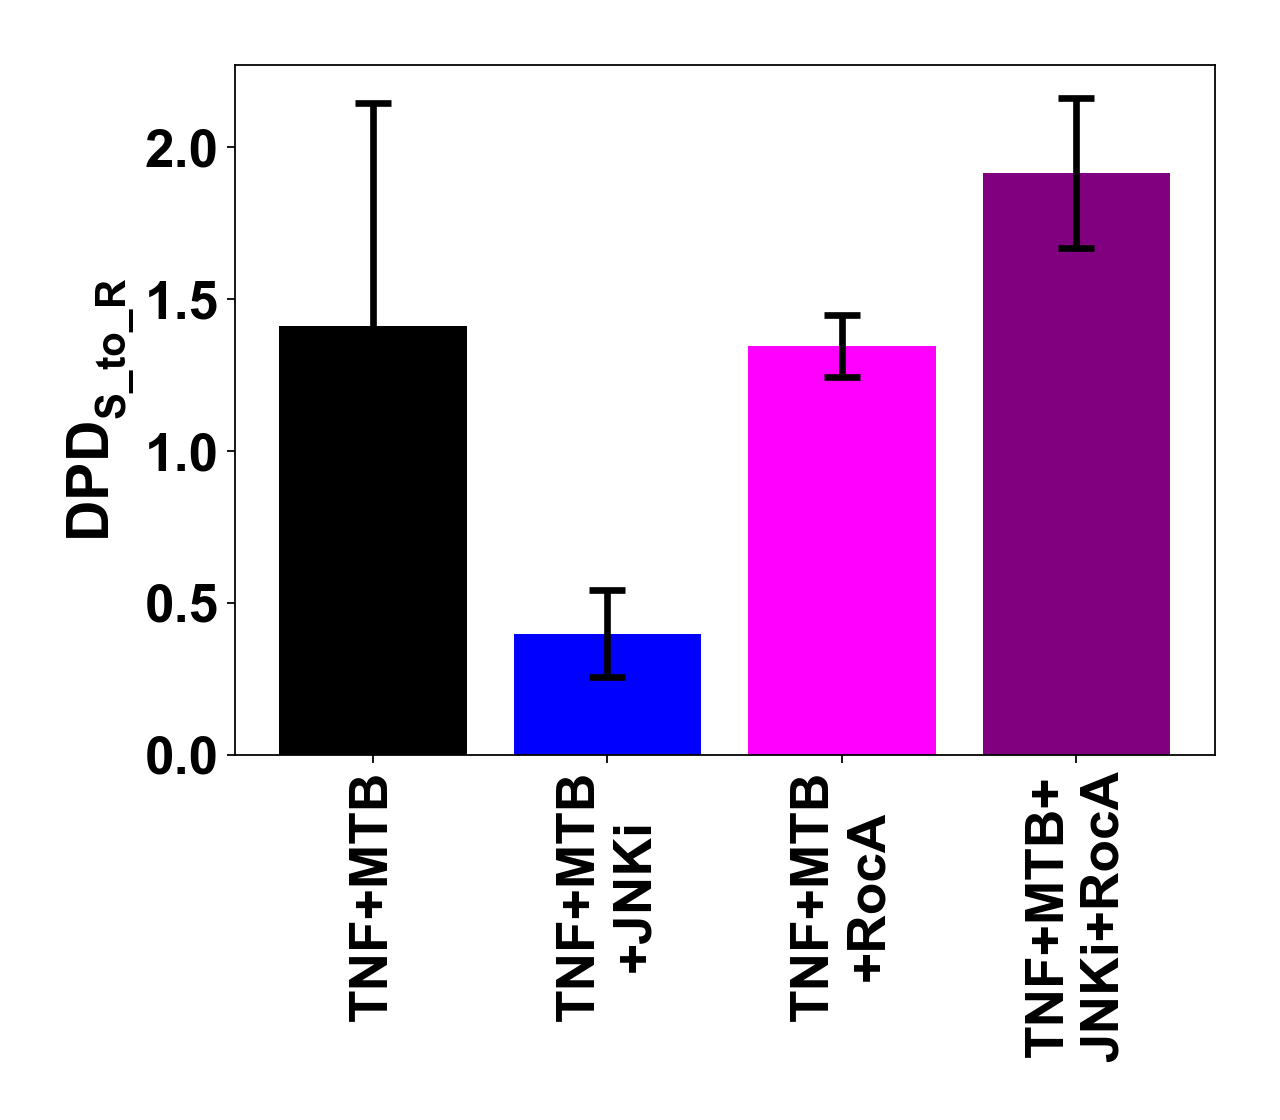

In [27]:
samples = ['TM_b','TMS','TMR_b','TMRS']

DPD_plot = DPDs_2D_TB.loc[samples,'DPD_TB']
errs_plot = DPDs_2D_TB.loc[samples,'err_DPD_TB']

names = ['TNF+MTB','TNF+MTB\n+JNKi','TNF+MTB\n+RocA','TNF+MTB+\nJNKi+RocA']
values = DPD_plot
errs = errs_plot

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 28} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 26} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 24} 
plt.rc('font', **fontAxes)

plt.ylabel('$\mathregular{DPD_{S\_to\_R}}$',**fontLabel)
plt.bar(names,values,capsize=5,yerr = errs,error_kw=dict(lw=3, capsize=8, capthick=3),color=['black','blue','magenta','purple'])
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()


In [28]:
x = total_dataset_com['TMR - TM'] = total_dataset_com.apply(lambda x: x['TMR'] - x['TM'], axis=1)
x = total_dataset_com['TMR_b - TM_b'] = total_dataset_com.apply(lambda x: x['TMR_b'] - x['TM_b'], axis=1)
x = total_dataset_com['TMI - TM'] = total_dataset_com.apply(lambda x: x['TMI'] - x['TM'], axis=1)
x = total_dataset_com['TMRI - TM'] = total_dataset_com.apply(lambda x: x['TMRI'] - x['TM'], axis=1)
x = total_dataset_com['TMS - TM_b'] = total_dataset_com.apply(lambda x: x['TMS'] - x['TM_b'], axis=1)
x = total_dataset_com['TMRS - TM_b'] = total_dataset_com.apply(lambda x: x['TMRS'] - x['TM_b'], axis=1)

x = total_dataset_com['TM - M'] = total_dataset_com.apply(lambda x: x['TM'] - x['M'], axis=1)

total_dataset_com

,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1,M,T,TM,TMR,...,TMS,TMRS,DMSO,TMR - TM,TMR_b - TM_b,TMI - TM,TMRI - TM,TMS - TM_b,TMRS - TM_b,TM - M
gene,,,,,,,,,,,,,,,,,,,,,
A230028O05Rik,0.000000,1.137350,1.274580,0.000000,1.203960,0.000000,-0.344753,-1.208658,-0.645691,0.681519,...,-1.198454,0.110238,0.0,1.327210,0.057162,0.477282,1.533077,-1.253984,0.054709,-0.300939
A230050P20Rik,0.000000,0.000000,1.263020,0.000000,1.300780,1.479910,0.626012,0.319772,0.527822,-0.020704,...,0.575537,0.176448,0.0,-0.548526,-0.436381,-0.178284,-0.643398,0.110447,-0.288641,-0.098190
A230059L01Rik,0.000000,0.000000,-2.106410,0.000000,0.000000,0.000000,1.205018,-1.675260,2.814648,0.653824,...,-1.596459,-1.747745,0.0,-2.160824,-2.770133,-4.452048,-4.646413,-3.594263,-3.745550,1.609630
A430046D13Rik,0.000000,-1.204380,-2.853830,0.000000,-1.317190,0.000000,-0.316958,-0.243272,-0.648745,-0.453289,...,-0.681684,-0.536290,0.0,0.195456,-0.112180,0.082259,0.200660,-0.190026,-0.044633,-0.331788
A430108G06Rik,-1.469380,-4.483050,0.000000,-1.560030,-3.569200,0.000000,-0.130977,0.369204,0.167843,-1.771092,...,0.158810,-1.452822,0.0,-1.938936,-1.960344,0.098101,-2.052922,0.004827,-1.606806,0.298820
A530017D24Rik,0.000000,0.000000,-1.317080,0.000000,0.000000,0.000000,-0.271720,-0.403598,-0.551608,-1.041514,...,-0.485658,-1.199617,0.0,-0.489906,-0.620637,0.188538,-0.712484,0.006355,-0.707603,-0.279888
A530064D06Rik,0.000000,0.000000,1.447580,0.000000,2.475340,2.325100,1.056433,0.687063,0.767477,3.274927,...,0.906521,3.140819,0.0,2.507450,2.820787,0.168219,2.309674,0.308412,2.542711,-0.288955
AA414768,0.000000,0.000000,1.203580,0.000000,1.214640,1.455350,0.380318,0.340969,0.701065,2.263205,...,0.643198,2.418885,0.0,1.562140,1.714255,-0.555074,1.538029,0.023727,1.799415,0.320747
AC132444.1,0.000000,0.000000,0.000000,0.000000,1.862280,0.000000,-0.064429,-0.529230,0.075576,-0.820289,...,-0.045664,-0.522069,0.0,-0.895865,-0.060642,0.513951,-0.221300,0.197562,-0.278842,0.140005


In [29]:

total_dataset_com['TMR_TM_NV'] = total_dataset_com['TMR - TM']*norm_vec_2D_df['norm_vec_TB']
total_dataset_com['TMR_b_TM_b_NV'] = total_dataset_com['TMR_b - TM_b']*norm_vec_2D_df['norm_vec_TB']
total_dataset_com['TMI_TM_NV'] = total_dataset_com['TMI - TM']*norm_vec_2D_df['norm_vec_TB']
total_dataset_com['TMRI_TM_NV'] = total_dataset_com['TMRI - TM']*norm_vec_2D_df['norm_vec_TB']
total_dataset_com['TMS_TM_v_NV'] = total_dataset_com['TMS - TM_b']*norm_vec_2D_df['norm_vec_TB']
total_dataset_com['TMRS_TM_b_NV'] = total_dataset_com['TMRS - TM_b']*norm_vec_2D_df['norm_vec_TB']

total_dataset_com['TM_M_NV'] = total_dataset_com['TM - M']*norm_vec_2D_df['norm_vec_TB']

total_dataset_com

,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1,M,T,TM,TMR,...,TMS - TM_b,TMRS - TM_b,TM - M,TMR_TM_NV,TMR_b_TM_b_NV,TMI_TM_NV,TMRI_TM_NV,TMS_TM_v_NV,TMRS_TM_b_NV,TM_M_NV
gene,,,,,,,,,,,,,,,,,,,,,
A230028O05Rik,0.000000,1.137350,1.274580,0.000000,1.203960,0.000000,-0.344753,-1.208658,-0.645691,0.681519,...,-1.253984,0.054709,-0.300939,2.779989e-03,0.000120,0.001000,3.211200e-03,-0.002627,0.000115,-0.000630
A230050P20Rik,0.000000,0.000000,1.263020,0.000000,1.300780,1.479910,0.626012,0.319772,0.527822,-0.020704,...,0.110447,-0.288641,-0.098190,2.011733e-03,0.001600,0.000654,2.359680e-03,-0.000405,0.001059,0.000360
A230059L01Rik,0.000000,0.000000,-2.106410,0.000000,0.000000,0.000000,1.205018,-1.675260,2.814648,0.653824,...,-3.594263,-3.745550,1.609630,6.972874e-03,0.008939,0.014367,1.499375e-02,0.011599,0.012087,-0.005194
A430046D13Rik,0.000000,-1.204380,-2.853830,0.000000,-1.317190,0.000000,-0.316958,-0.243272,-0.648745,-0.453289,...,-0.190026,-0.044633,-0.331788,-8.485460e-04,0.000487,-0.000357,-8.711374e-04,0.000825,0.000194,0.001440
A430108G06Rik,-1.469380,-4.483050,0.000000,-1.560030,-3.569200,0.000000,-0.130977,0.369204,0.167843,-1.771092,...,0.004827,-1.606806,0.298820,-8.024570e-04,-0.000811,0.000041,-8.496318e-04,0.000002,-0.000665,0.000124
A530017D24Rik,0.000000,0.000000,-1.317080,0.000000,0.000000,0.000000,-0.271720,-0.403598,-0.551608,-1.041514,...,0.006355,-0.707603,-0.279888,9.884949e-04,0.001252,-0.000380,1.437595e-03,-0.000013,0.001428,0.000565
A530064D06Rik,0.000000,0.000000,1.447580,0.000000,2.475340,2.325100,1.056433,0.687063,0.767477,3.274927,...,0.308412,2.542711,-0.288955,-2.114395e-02,-0.023786,-0.001418,-1.947621e-02,-0.002601,-0.021441,0.002437
AA414768,0.000000,0.000000,1.203580,0.000000,1.214640,1.455350,0.380318,0.340969,0.701065,2.263205,...,0.023727,1.799415,0.320747,-5.294482e-03,-0.005810,0.001881,-5.212763e-03,-0.000080,-0.006099,-0.001087
AC132444.1,0.000000,0.000000,0.000000,0.000000,1.862280,0.000000,-0.064429,-0.529230,0.075576,-0.820289,...,0.197562,-0.278842,0.140005,7.142504e-03,0.000483,-0.004098,1.764369e-03,-0.001575,0.002223,-0.001116


In [31]:
genecont = total_dataset_com[['TMR_TM_NV','TMR_b_TM_b_NV','TMI_TM_NV','TMRI_TM_NV','TMS_TM_v_NV','TMRS_TM_b_NV','TM_M_NV']]
genecont.to_csv('genecontributions.csv')
genecont.sort_values(by='TMR_TM_NV')


,TMR_TM_NV,TMR_b_TM_b_NV,TMI_TM_NV,TMRI_TM_NV,TMS_TM_v_NV,TMRS_TM_b_NV,TM_M_NV
gene,,,,,,,
Adam3,-0.545727,-0.580496,0.031815,-0.222715,-0.061700,-0.159816,-0.221083
Oasl1,-0.443375,-0.376710,-0.085033,-0.363503,-0.078647,-0.389890,0.488542
Mgam,-0.287281,-0.029155,-0.204847,-0.327280,-0.001187,-0.090238,0.288384
Gm38386,-0.269672,-0.511335,0.022645,-0.433909,-0.004491,-0.159350,0.034943
Ms4a4c,-0.255897,-0.122580,-0.057168,-0.157979,-0.016394,-0.156664,0.375815
Mirt1,-0.225657,-0.217521,-0.001998,-0.297991,-0.008744,-0.157828,-0.007589
Vwf,-0.192571,-0.161296,-0.026719,-0.205144,0.003328,-0.161920,0.054019
Ifi205,-0.183735,-0.169140,-0.035573,-0.161369,-0.034181,-0.175415,0.148524
Ptges,-0.177508,-0.221716,0.071483,-0.160260,-0.000945,-0.216746,-0.070395
